In [1]:
import torch
import torchxrayvision as xrv
from torchvision import transforms

from matplotlib import pyplot as plt

In [2]:
# Setup variables
path_to_chexpert = "/zfs/wficai/chexpert/chexpertchestxrays-u20210408/"
# Load dataset
d_chex = xrv.datasets.CheX_Dataset(
                imgpath=path_to_chexpert,
                csvpath=f"{path_to_chexpert}/train.csv",
                # transform=self.transforms_pytorch,
            )

In [3]:
d_chex.pathologies

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Enlarged Cardiomediastinum',
 'Fracture',
 'Lung Lesion',
 'Lung Opacity',
 'Effusion',
 'Pleural Other',
 'Pneumonia',
 'Pneumothorax',
 'Support Devices']

In [4]:
d_chex.labels

array([[ 0.,  0.,  0., ...,  0.,  0., nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  1., nan, ..., nan, nan, nan],
       ...,
       [nan,  1., nan, ..., nan, nan,  1.],
       [nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0., nan]], dtype=float32)

(1, 1741, 2022)


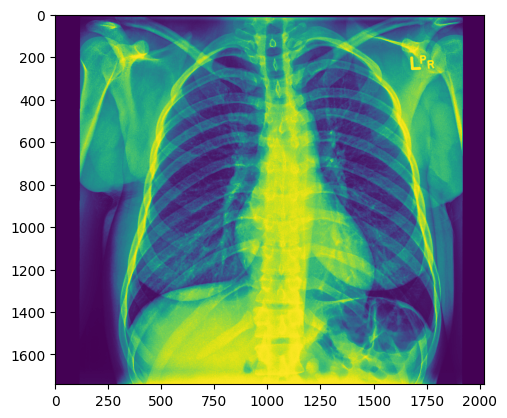

In [11]:
plt.imshow(d_chex[0]['img'][0])
print(d_chex[0]['img'].shape)

In [22]:
xrv.datasets.CheX_Dataset??

Init signature:
xrv.datasets.CheX_Dataset(
    imgpath,
    csvpath='/home/jplineb/.conda/envs/pda/lib/python3.9/site-packages/torchxrayvision/data/chexpert_train.csv.gz',
    views=['PA'],
    transform=None,
    data_aug=None,
    flat_dir=True,
    seed=0,
    unique_patients=True,
)
Source:        
class CheX_Dataset(Dataset):
    """CheXpert Dataset

    CheXpert: A Large Chest Radiograph Dataset with Uncertainty Labels and Expert Comparison.
    Jeremy Irvin *, Pranav Rajpurkar *, Michael Ko, Yifan Yu, Silviana Ciurea-Ilcus, Chris Chute,
    Henrik Marklund, Behzad Haghgoo, Robyn Ball, Katie Shpanskaya, Jayne Seekins, David A. Mong,
    Safwan S. Halabi, Jesse K. Sandberg, Ricky Jones, David B. Larson, Curtis P. Langlotz,
    Bhavik N. Patel, Matthew P. Lungren, Andrew Y. Ng. https://arxiv.org/abs/1901.07031

    Dataset website here:
    https://stanfordmlgroup.github.io/competitions/chexpert/

    A small validation set is provided with the data as well, but is so tiny, it not 

# Using transforms to create greyscale

In [26]:
# Define Transforms
tfsms = transforms.Compose(
                [xrv.datasets.XRayCenterCrop(), xrv.datasets.XRayResizer(224), xrv.datasets.ToPILImage()]
            )

To PIL image uses `mode=F` 
`F: (32-bit floating point pixels)`

https://discuss.pytorch.org/t/grayscale-to-rgb-transform/18315/9

In [14]:
# Load dataset
d_chex = xrv.datasets.CheX_Dataset(
                imgpath=path_to_chexpert,
                csvpath=f"{path_to_chexpert}/train.csv",
                transform=tfsms,
            )

AttributeError: shape

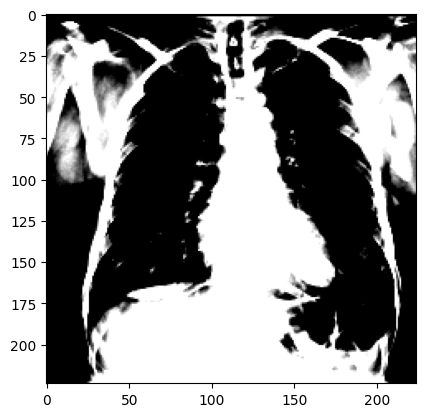

In [16]:
plt.imshow(d_chex[0]['img'])
print(d_chex[0]['img'].shape)

In [21]:
d_chex[0]['img'].size

(224, 224)

# Using custom Tranform

In [43]:
# Define Transforms
tfsms = transforms.Compose(
                [xrv.datasets.XRayCenterCrop(),
                 xrv.datasets.XRayResizer(224),
                 xrv.datasets.ToPILImage(),
                 transforms.Grayscale(3)]
            )

In [44]:
# Load dataset
d_chex = xrv.datasets.CheX_Dataset(
                imgpath=path_to_chexpert,
                csvpath=f"{path_to_chexpert}/train.csv",
                transform=tfsms,
            )

In [45]:
d_chex[0]

{'idx': 0,
 'lab': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan],
       dtype=float32),
 'img': <PIL.Image.Image image mode=RGB size=224x224>}